In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

Using TensorFlow backend.


In [2]:
# 데이터 입력
df_pre = pd.read_csv('../dataset/wine.csv', header=None)
df = df_pre.sample(frac=1)

print('shape:',df.shape)
df.head()

shape: (6497, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
5316,6.3,0.18,0.24,3.4,0.053,20.0,119.0,0.99373,3.11,0.52,9.2,6,0
5210,6.8,0.14,0.18,1.4,0.047,30.0,90.0,0.99164,3.27,0.54,11.2,6,0
3518,7.3,0.22,0.50,13.7,0.049,56.0,189.0,0.99940,3.24,0.66,9.0,6,0
1622,7.6,0.67,0.14,1.5,0.074,25.0,168.0,0.99370,3.05,0.51,9.3,5,0
2443,7.3,0.21,0.29,1.6,0.034,29.0,118.0,0.99170,3.30,0.50,11.0,8,0


In [3]:
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [4]:
# 모델 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#모델 컴파일
model.compile(loss='binary_crossentropy',
           optimizer='adam',
           metrics=['accuracy'])

# 모델 실행
model.fit(X, Y, epochs=20, batch_size=10, verbose=0)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

6497/6497 [==============================] - 0s 41us/step

 Accuracy: 0.9831


In [5]:
import os

# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

In [6]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 모델 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#모델 컴파일
model.compile(loss='binary_crossentropy',
           optimizer='adam',
           metrics=['accuracy'])

# 모델 실행 및 저장
model.fit(X, Y, validation_split=0.33, epochs=20, batch_size=10, verbose=0, callbacks=[checkpointer])

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Epoch 00001: val_loss improved from inf to 0.17054, saving model to ./model/01-0.1705.hdf5
Epoch 00002: val_loss did not improve
Epoch 00003: val_loss improved from 0.17054 to 0.14779, saving model to ./model/03-0.1478.hdf5
Epoch 00004: val_loss improved from 0.14779 to 0.13741, saving model to ./model/04-0.1374.hdf5
Epoch 00005: val_loss did not improve
Epoch 00006: val_loss improved from 0.13741 to 0.10485, saving model to ./model/06-0.1048.hdf5
Epoch 00007: val_loss did not improve
Epoch 00008: val_loss improved from 0.10485 to 0.08511, saving model to ./model/08-0.0851.hdf5
Epoch 00009: val_loss improved from 0.08511 to 0.08340, saving model to ./model/09-0.0834.hdf5
Epoch 00010: val_loss improved from 0.08340 to 0.08329, saving model to ./model/10-0.0833.hdf5
Epoch 00011: val_loss did not improve
Epoch 00012: val_loss did not improve
Epoch 00013: val_loss improved from 0.08329 to 0.06580, saving model to ./model/13-0.0658.hdf5
Epoch 00014: val_loss improved from 0.06580 to 0.06520

In [7]:
# Provided you are running IPython, the %matplotlib inline will make your plot outputs appear and be stored within the notebook.
%matplotlib inline

In [35]:
df = df_pre.sample(frac=0.15)
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

# 모델 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#모델 컴파일
model.compile(loss='binary_crossentropy',
           optimizer='adam',
           metrics=['accuracy'])

# 모델 실행
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500, verbose=0)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

975/975 [==============================] - 0s 72us/step

 Accuracy: 0.9928


[   0    1    2 ..., 3497 3498 3499]


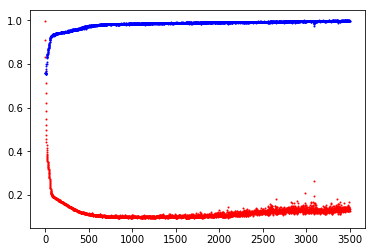

In [41]:
import matplotlib.pyplot as plt

# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
y_acc=history.history['acc']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
print(x_len)
plt.plot(x_len, y_vloss, "o", c="red", markersize=1)
plt.plot(x_len, y_acc, "o", c="blue", markersize=1)

plt.show()

***
*히스토리 비교*

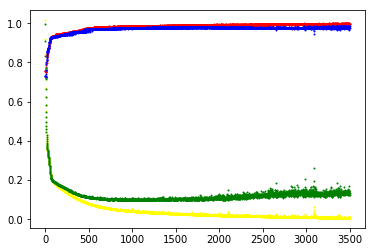

In [42]:
plt.clf()
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, history.history['acc'], "o", c="red", markersize=1) # 테스트셋 정확도
plt.plot(x_len, history.history['val_acc'], "o", c="blue", markersize=1) # 검증셋 정확도


plt.plot(x_len, history.history['loss'], "o", c="yellow", markersize=1) # 테스트셋 오차
plt.plot(x_len, history.history['val_loss'], "o", c="green", markersize=1) # 검증셋 오차

plt.show()


***
*과적합 예제를 다듬을 필요가 있음 과적합이 잘 표가 안나는 이유는 테스트 셋을 분리하지 않았기 때문으로 보임  
광물예제에서 사용한 방식으로 데이터셋 분리*

***저문제는 아니고 다만 데이터가 과적합 표가 안나는 것으로 보임.  
추세를 보는용도로... ***

In [175]:
from sklearn.model_selection import train_test_split


df = df_pre.sample(frac=0.2)
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

# 학습 셋과 테스트 셋의 구분
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=seed)

print(X_train.shape)

(870, 12)


In [176]:
# 모델 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#모델 컴파일
model.compile(loss='binary_crossentropy',
           optimizer='adam',
           metrics=['accuracy'])

# 모델 실행
history = model.fit(X_train, Y_train, epochs=3500, batch_size=500, verbose=0, validation_data=(X_test, Y_test))

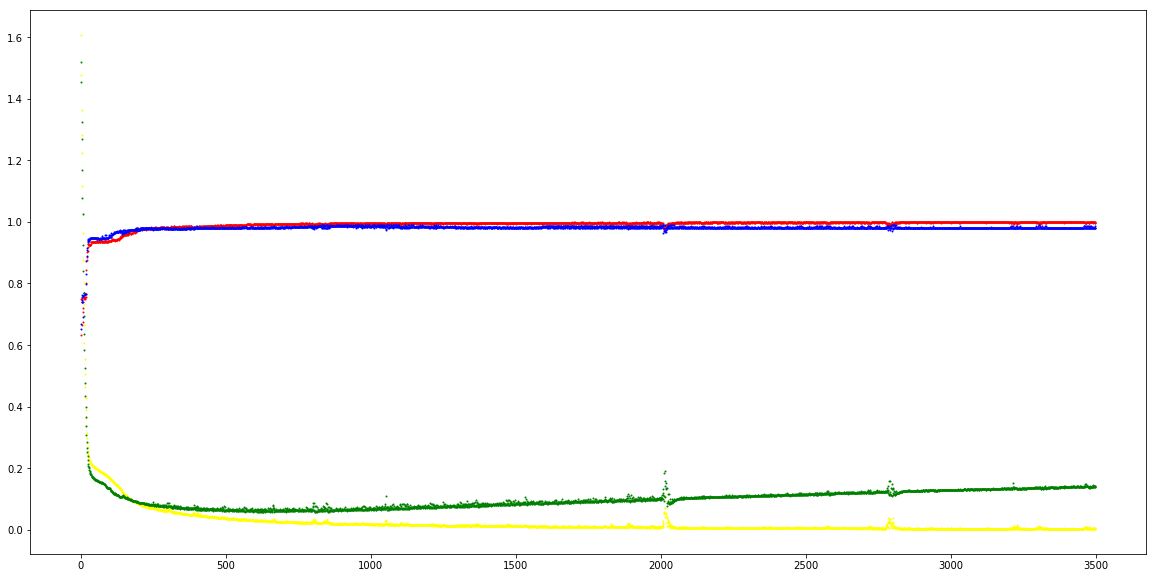

In [177]:
plt.close()
x_len = numpy.arange(len(history.history['acc']))
plt.plot(x_len, history.history['acc'], "o", c="red", markersize=1) # 테스트셋 정확도
plt.plot(x_len, history.history['val_acc'], "o", c="blue", markersize=1) # 검증셋 정확도


plt.plot(x_len, history.history['loss'], "o", c="yellow", markersize=1) # 테스트셋 오차
plt.plot(x_len, history.history['val_loss'], "o", c="green", markersize=1) # 검증셋 오차
#plt.figure(figsize=(10, 5))
plt.show()

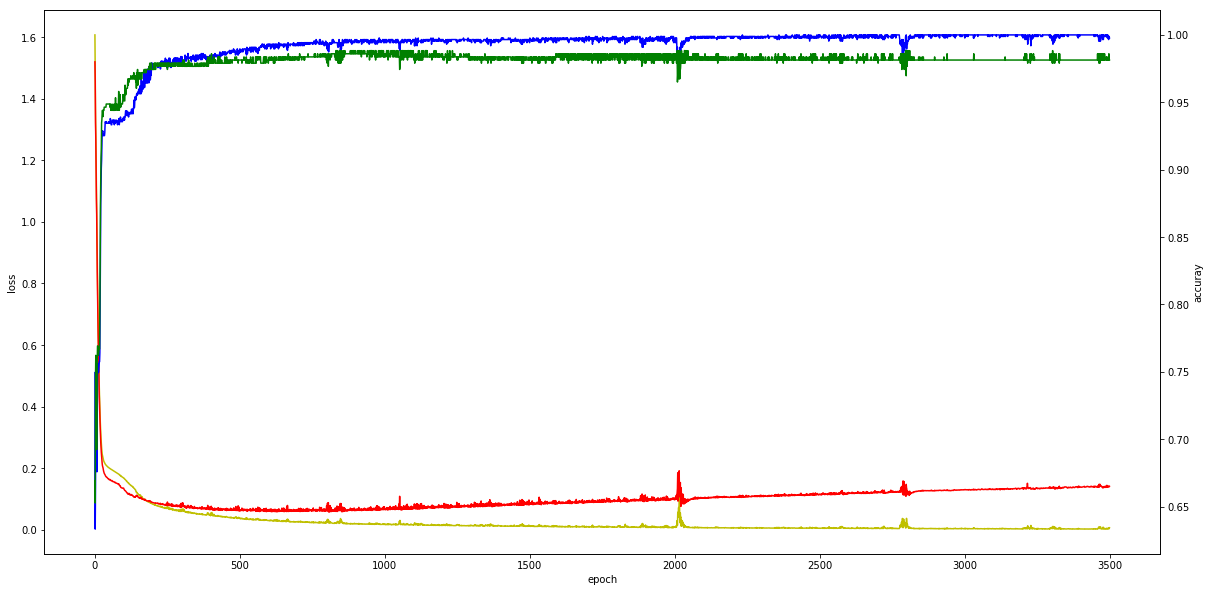

In [185]:
plt.close()

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

# plt.figure(figsize=(5, 30))
plt.show()

In [208]:
from keras.callbacks import EarlyStopping

df = df_pre.sample(frac=0.15)
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

# 모델 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#모델 컴파일
model.compile(loss='binary_crossentropy',
           optimizer='adam',
           metrics=['accuracy'])

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=500, verbose=0, callbacks=[early_stopping_callback,checkpointer])

print('중단횟수:',len(history.history['acc']))


중단횟수: 782
